In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_excel('MaternalMortality__.xlsx')

In [3]:
data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel
495,42,120,80,7.9,98,70,26.2,Low,low risk
496,23,90,60,7.9,98,76,19.9,High,low risk
497,19,120,80,7.0,98,70,23.2,High,low risk
498,15,76,49,7.9,98,77,20.5,High,low risk
499,48,120,80,11.0,98,88,27.7,Low,mid risk


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          500 non-null    int64  
 1   SystolicBP   500 non-null    int64  
 2   DiastolicBP  500 non-null    int64  
 3   BS           500 non-null    float64
 4   BodyTemp     500 non-null    int64  
 5   HeartRate    500 non-null    int64  
 6   BMI          500 non-null    float64
 7   Anaemia      500 non-null    object 
 8   RiskLevel    500 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 35.3+ KB


In [5]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'BMI', 'Anaemia', 'RiskLevel'],
      dtype='object')

In [6]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel
0,25,130,80,15.0,98,86,26.0,Low,high risk
1,35,140,90,13.0,98,70,23.4,Low,high risk
2,29,90,70,8.0,100,80,26.6,Low,high risk
3,30,140,85,7.0,98,70,30.1,Low,high risk
4,35,120,60,6.1,98,76,23.1,High,low risk
...,...,...,...,...,...,...,...,...,...
495,42,120,80,7.9,98,70,26.2,Low,low risk
496,23,90,60,7.9,98,76,19.9,High,low risk
497,19,120,80,7.0,98,70,23.2,High,low risk
498,15,76,49,7.9,98,77,20.5,High,low risk


In [17]:

# Load second dataset (pick exact question columns)
data2 = pd.read_csv(
    "PPH_Data_Expanded_500.csv",
    usecols=[
        'What mode of delivery have you had before?',
        'Have you ever had heavy bleeding after giving birth?',
        'How many times have you given birth (including this one if pregnant now)?'
    ]
)

# Rename long questions to short names
data2 = data2.rename(columns={
    'What mode of delivery have you had before?': 'Mode_of_delivery',
    'Have you ever had heavy bleeding after giving birth?': 'History_of_Past_PPH',
    'How many times have you given birth (including this one if pregnant now)?': 'Parity'
})

# Merging the two datasets
merged = pd.concat([data, data2], axis=1)

# Save as Excel
merged.to_excel("maternalMotality.xlsx", index=False)

print(merged.head())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate   BMI Anaemia  \
0   25         130           80  15.0        98         86  26.0     Low   
1   35         140           90  13.0        98         70  23.4     Low   
2   29          90           70   8.0       100         80  26.6     Low   
3   30         140           85   7.0        98         70  30.1     Low   
4   35         120           60   6.1        98         76  23.1    High   

   RiskLevel         Mode_of_delivery History_of_Past_PPH  \
0  high risk  Normal vaginal delivery                 Yes   
1  high risk  Normal vaginal delivery                  No   
2  high risk  Normal vaginal delivery                  No   
3  high risk  Normal vaginal delivery                  No   
4   low risk  Normal vaginal delivery                  No   

                  Parity  
0  This is my first time  
1                      5  
2  This is my first time  
3                      7  
4                      2  


In [18]:
#Loading the merged dataset and saving it as variable 'df'
df = pd.read_excel('maternalMotality.xlsx')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel,Mode_of_delivery,History_of_Past_PPH,Parity
0,25,130,80,15.0,98,86,26.0,Low,high risk,Normal vaginal delivery,Yes,This is my first time
1,35,140,90,13.0,98,70,23.4,Low,high risk,Normal vaginal delivery,No,5
2,29,90,70,8.0,100,80,26.6,Low,high risk,Normal vaginal delivery,No,This is my first time
3,30,140,85,7.0,98,70,30.1,Low,high risk,Normal vaginal delivery,No,7
4,35,120,60,6.1,98,76,23.1,High,low risk,Normal vaginal delivery,No,2


# Exploratory Data Analysis

In [21]:
# replacing every occurence of 'This is my first time with 1'
df['Parity'] = df['Parity'].apply(lambda x: 1 if x == "This is my first time" else x)

In [22]:
df.head(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel,Mode_of_delivery,History_of_Past_PPH,Parity
0,25,130,80,15.00,98,86,26.0,Low,high risk,Normal vaginal delivery,Yes,1
1,35,140,90,13.00,98,70,23.4,Low,high risk,Normal vaginal delivery,No,5
2,29,90,70,8.00,100,80,26.6,Low,high risk,Normal vaginal delivery,No,1
3,30,140,85,7.00,98,70,30.1,Low,high risk,Normal vaginal delivery,No,7
4,35,120,60,6.10,98,76,23.1,High,low risk,Normal vaginal delivery,No,2
5,23,140,80,7.01,98,70,23.1,High,high risk,Through operation (Caesarean Section / CS),No,3
6,23,130,70,7.01,98,78,30.3,High,mid risk,Normal vaginal delivery,No,3
7,35,85,60,11.00,102,86,27.1,High,high risk,Normal vaginal delivery,No,6
8,32,120,90,6.90,98,70,22.1,Low,mid risk,Normal vaginal delivery,Yes,1
9,42,130,80,18.00,98,70,26.2,Low,high risk,Through operation (Caesarean Section / CS),No,1


In [23]:
df['Mode_of_delivery'].value_counts()

,count
Mode_of_delivery,
Normal vaginal delivery,342
Through operation (Caesarean Section / CS),92
Both,66


In [24]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'BMI', 'Anaemia', 'RiskLevel', 'Mode_of_delivery',
       'History_of_Past_PPH', 'Parity'],
      dtype='object')

In [25]:
df['Anaemia'].value_counts()

,count
Anaemia,
High,260
Low,240


In [26]:
df['Mode_of_delivery'].value_counts()

,count
Mode_of_delivery,
Normal vaginal delivery,342
Through operation (Caesarean Section / CS),92
Both,66


# Removing outliers using domain knowledge

In [27]:
df['Age'].value_counts()

,count
Age,
23,37
35,33
25,31
19,28
22,27
15,24
21,24
55,23
32,23


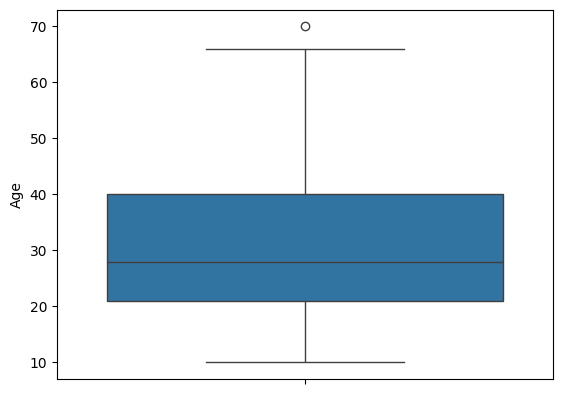

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: visualize outliers in Age
sns.boxplot(y=df['Age'])
plt.show()

## Documentation Note

## Step: Handling Outliers in Age

## According to the World Health Organization (WHO), the reproductive age range for women is 15 to 49 years.

## In our dataset, we observed ages as high as 50, 60, 68, and 70, which fall outside the medically accepted range for maternal cases.

## Since 15.4% of the rows were affected, we chose not to drop them (to avoid losing valuable data).

## Instead, we applied capping (Winsorization):

## Any value below 15 is set to 15.

## Any value above 49 is set to 49.

## This approach keeps the data realistic while retaining all rows for modeling.

In [29]:
#I want to use this code to check values that falls above that range
df[df['Age'] > 49]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel,Mode_of_delivery,History_of_Past_PPH,Parity
16,50,140,90,15.0,98,90,19.9,Low,high risk,Normal vaginal delivery,Yes,4
21,50,140,80,6.7,98,70,23.1,Low,mid risk,Through operation (Caesarean Section / CS),No,1
36,60,120,80,6.1,98,75,24.8,Low,low risk,Normal vaginal delivery,Yes,3
37,55,100,65,6.1,98,66,16.2,High,low risk,Both,No,5
54,60,90,65,7.0,98,77,28.1,High,low risk,Both,Yes,4
...,...,...,...,...,...,...,...,...,...,...,...,...
435,65,130,80,15.0,98,86,24.3,Low,high risk,Normal vaginal delivery,No,3
467,50,140,90,15.0,98,90,27.0,Low,high risk,Both,No,4
482,50,140,95,17.0,98,60,17.6,Low,high risk,Normal vaginal delivery,No,1
485,60,90,65,7.9,98,77,18.3,High,low risk,Normal vaginal delivery,No,3


In [30]:
#cappling the age to fall between 15 and 49
df['Age'] = df['Age'].apply(lambda x: 15 if x < 15 else (49 if x > 49 else x))#we might try log transformation instead of capping depending on performance

In [31]:
df['Age'].value_counts()

,count
Age,
49,81
15,50
23,37
35,33
25,31
19,28
22,27
21,24
32,23


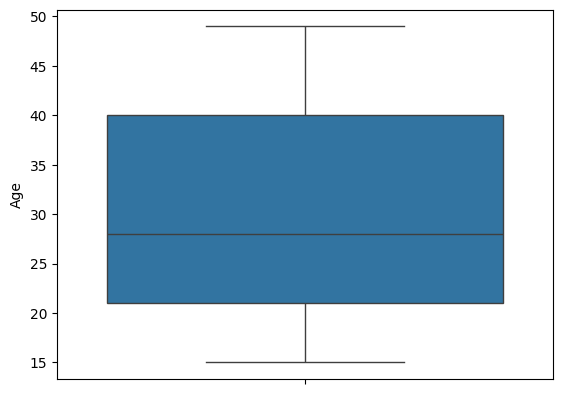

In [32]:
#After removing outliers
sns.boxplot(y=df['Age'])
plt.show()

In [33]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'BMI', 'Anaemia', 'RiskLevel', 'Mode_of_delivery',
       'History_of_Past_PPH', 'Parity'],
      dtype='object')

# Note on Systolic Blood Pressure (SBP) in Pregnancy

## Blood Pressure (Systolic & Diastolic)

## Blood pressure values were not capped, because extreme but valid values carry clinical meaning for conditions such as preeclampsia.

## Instead, values were categorized into risk groups:

## Systolic: Low (<90), Normal (90–129), Elevated (130–139), High (140–159), Severe (≥160).

## Diastolic: Normal (60–79), High (≥90).

# Systolic blood pressure distribution and outlier detection

In [34]:
# #distribution of systolic blood pressure
# sns.histplot(df['SystolicBP'], kde=True)

<Axes: ylabel='SystolicBP'>

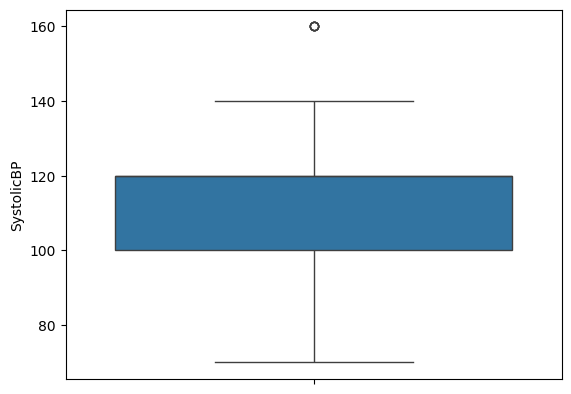

In [35]:
#outlier detection
sns.boxplot(y=df['SystolicBP'])

# Feature engineering

In [36]:
# Systolic BP categories
def categorize_sbp(x):
    if x < 90: return "Low"
    elif 90 <= x <= 129: return "Normal"
    elif 130 <= x <= 139: return "Elevated"
    elif 140 <= x <= 159: return "High"
    else: return "Severe"

df['SBP_Category'] = df['SystolicBP'].apply(categorize_sbp)

In [37]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel,Mode_of_delivery,History_of_Past_PPH,Parity,SBP_Category
0,25,130,80,15.0,98,86,26.0,Low,high risk,Normal vaginal delivery,Yes,1,Elevated
1,35,140,90,13.0,98,70,23.4,Low,high risk,Normal vaginal delivery,No,5,High
2,29,90,70,8.0,100,80,26.6,Low,high risk,Normal vaginal delivery,No,1,Normal
3,30,140,85,7.0,98,70,30.1,Low,high risk,Normal vaginal delivery,No,7,High
4,35,120,60,6.1,98,76,23.1,High,low risk,Normal vaginal delivery,No,2,Normal


In [39]:
# Diastolic BP categories
def categorize_dbp(x):
    if x < 60:
        return "Low"
    elif 60 <= x <= 79:
        return "Normal"
    elif 80 <= x <= 89:
        return "High"
    else:
        return "Severe"

df['DBP_Category'] = df['DiastolicBP'].apply(categorize_dbp)

In [40]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel,Mode_of_delivery,History_of_Past_PPH,Parity,SBP_Category,DBP_Category
0,25,130,80,15.0,98,86,26.0,Low,high risk,Normal vaginal delivery,Yes,1,Elevated,High
1,35,140,90,13.0,98,70,23.4,Low,high risk,Normal vaginal delivery,No,5,High,Severe
2,29,90,70,8.0,100,80,26.6,Low,high risk,Normal vaginal delivery,No,1,Normal,Normal
3,30,140,85,7.0,98,70,30.1,Low,high risk,Normal vaginal delivery,No,7,High,High
4,35,120,60,6.1,98,76,23.1,High,low risk,Normal vaginal delivery,No,2,Normal,Normal


In [41]:
df['BS'].value_counts()

,count
BS,
6.90,82
6.80,53
7.80,38
7.00,37
6.10,33
15.00,30
7.90,26
7.50,25
11.00,25


In [42]:
#blood sugar range
def categorize_bs(x):
    if x < 4.0:
        return "Low"
    elif 4.0 <= x <= 5.4:
        return "Normal (Fasting)"
    elif 5.5 <= x <= 7.8:
        return "Normal (Post-meal)"
    elif 7.9 <= x <= 11.0:
        return "Prediabetes"
    else:
        return "Diabetes"

df['BS_Category'] = df['BS'].apply(categorize_bs)


In [43]:
df.head(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel,Mode_of_delivery,History_of_Past_PPH,Parity,SBP_Category,DBP_Category,BS_Category
0,25,130,80,15.00,98,86,26.0,Low,high risk,Normal vaginal delivery,Yes,1,Elevated,High,Diabetes
1,35,140,90,13.00,98,70,23.4,Low,high risk,Normal vaginal delivery,No,5,High,Severe,Diabetes
2,29,90,70,8.00,100,80,26.6,Low,high risk,Normal vaginal delivery,No,1,Normal,Normal,Prediabetes
3,30,140,85,7.00,98,70,30.1,Low,high risk,Normal vaginal delivery,No,7,High,High,Normal (Post-meal)
4,35,120,60,6.10,98,76,23.1,High,low risk,Normal vaginal delivery,No,2,Normal,Normal,Normal (Post-meal)
5,23,140,80,7.01,98,70,23.1,High,high risk,Through operation (Caesarean Section / CS),No,3,High,High,Normal (Post-meal)
6,23,130,70,7.01,98,78,30.3,High,mid risk,Normal vaginal delivery,No,3,Elevated,Normal,Normal (Post-meal)
7,35,85,60,11.00,102,86,27.1,High,high risk,Normal vaginal delivery,No,6,Low,Normal,Prediabetes
8,32,120,90,6.90,98,70,22.1,Low,mid risk,Normal vaginal delivery,Yes,1,Normal,Severe,Normal (Post-meal)
9,42,130,80,18.00,98,70,26.2,Low,high risk,Through operation (Caesarean Section / CS),No,1,Elevated,High,Diabetes


In [44]:
#body temperature category
def categorize_temp(x):
    if x < 95:
        return "Hypothermia"
    elif 95 <= x <= 99.5:
        return "Normal"
    elif 99.6 <= x <= 100.9:
        return "Low-grade fever"
    elif 101 <= x <= 103:
        return "Fever"
    else:
        return "High fever"

df['Temp_Category'] = df['BodyTemp'].apply(categorize_temp)


In [45]:
#Heart rate
def categorize_hr(x):
    if x < 60:
        return "Bradycardia"
    elif 60 <= x <= 100:
        return "Normal"
    elif 101 <= x <= 120:
        return "Mild Tachycardia"
    else:
        return "Severe Tachycardia"

df['HR_Category'] = df['HeartRate'].apply(categorize_hr)


In [46]:
#for body mass index
def categorize_bmi(x):
    if x < 18.5:
        return "Underweight"
    elif 18.5 <= x <= 24.9:
        return "Normal"
    elif 25 <= x <= 29.9:
        return "Overweight"
    elif 30 <= x <= 34.9:
        return "Obesity I"
    elif 35 <= x <= 39.9:
        return "Obesity II"
    else:
        return "Obesity III"

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)


In [47]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel,Mode_of_delivery,History_of_Past_PPH,Parity,SBP_Category,DBP_Category,BS_Category,Temp_Category,HR_Category,BMI_Category
0,25,130,80,15.00,98,86,26.0,Low,high risk,Normal vaginal delivery,Yes,1,Elevated,High,Diabetes,Normal,Normal,Overweight
1,35,140,90,13.00,98,70,23.4,Low,high risk,Normal vaginal delivery,No,5,High,Severe,Diabetes,Normal,Normal,Normal
2,29,90,70,8.00,100,80,26.6,Low,high risk,Normal vaginal delivery,No,1,Normal,Normal,Prediabetes,Low-grade fever,Normal,Overweight
3,30,140,85,7.00,98,70,30.1,Low,high risk,Normal vaginal delivery,No,7,High,High,Normal (Post-meal),Normal,Normal,Obesity I
4,35,120,60,6.10,98,76,23.1,High,low risk,Normal vaginal delivery,No,2,Normal,Normal,Normal (Post-meal),Normal,Normal,Normal
5,23,140,80,7.01,98,70,23.1,High,high risk,Through operation (Caesarean Section / CS),No,3,High,High,Normal (Post-meal),Normal,Normal,Normal
6,23,130,70,7.01,98,78,30.3,High,mid risk,Normal vaginal delivery,No,3,Elevated,Normal,Normal (Post-meal),Normal,Normal,Obesity I
7,35,85,60,11.00,102,86,27.1,High,high risk,Normal vaginal delivery,No,6,Low,Normal,Prediabetes,Fever,Normal,Overweight
8,32,120,90,6.90,98,70,22.1,Low,mid risk,Normal vaginal delivery,Yes,1,Normal,Severe,Normal (Post-meal),Normal,Normal,Normal
9,42,130,80,18.00,98,70,26.2,Low,high risk,Through operation (Caesarean Section / CS),No,1,Elevated,High,Diabetes,Normal,Normal,Overweight


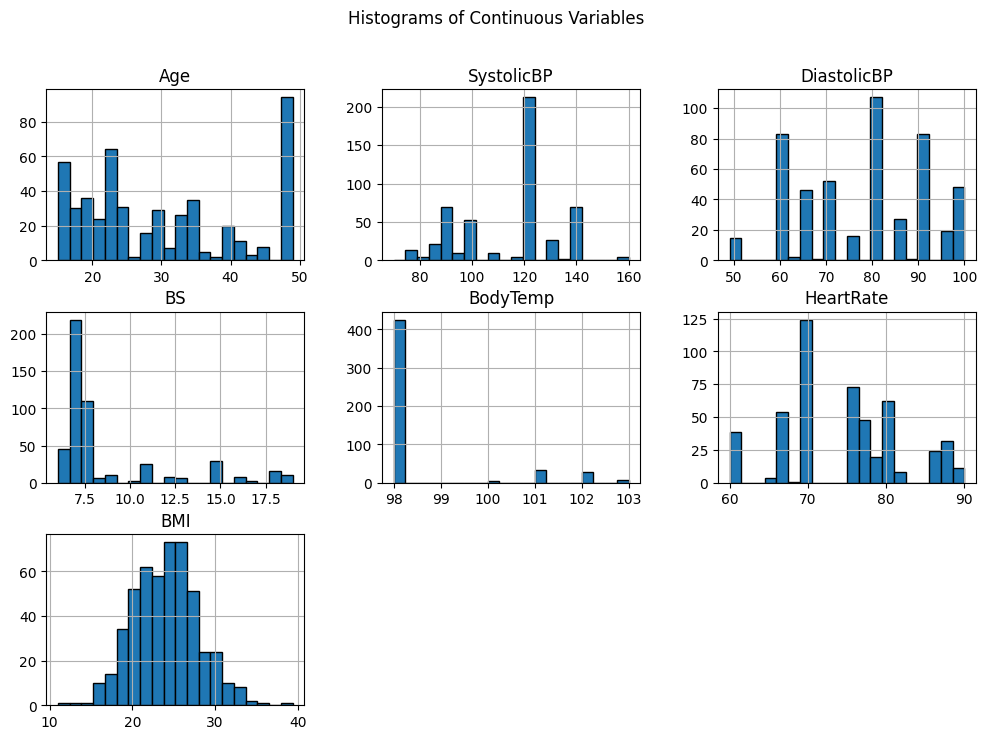

In [48]:
#histogram distribution
cont_features = ["Age","SystolicBP","DiastolicBP","BS","BodyTemp","HeartRate","BMI"]

df[cont_features].hist(figsize=(12,8), bins=20, edgecolor="black")
plt.suptitle("Histograms of Continuous Variables")
plt.show()


/tmp/ipython-input-1004807387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RiskLevel", data=df, palette="Set2")


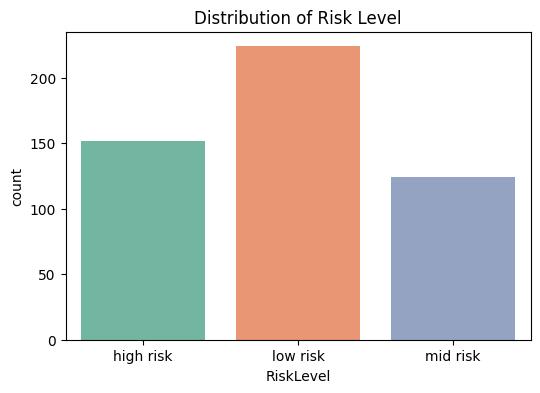

RiskLevel
low risk     0.448
high risk    0.304
mid risk     0.248
Name: proportion, dtype: float64


In [ ]:
#to check for class imbalance
plt.figure(figsize=(6,4))
sns.countplot(x="RiskLevel", data=df, palette="Set2")
plt.title("Distribution of Risk Level")
plt.show()

print(df["RiskLevel"].value_counts(normalize=True))


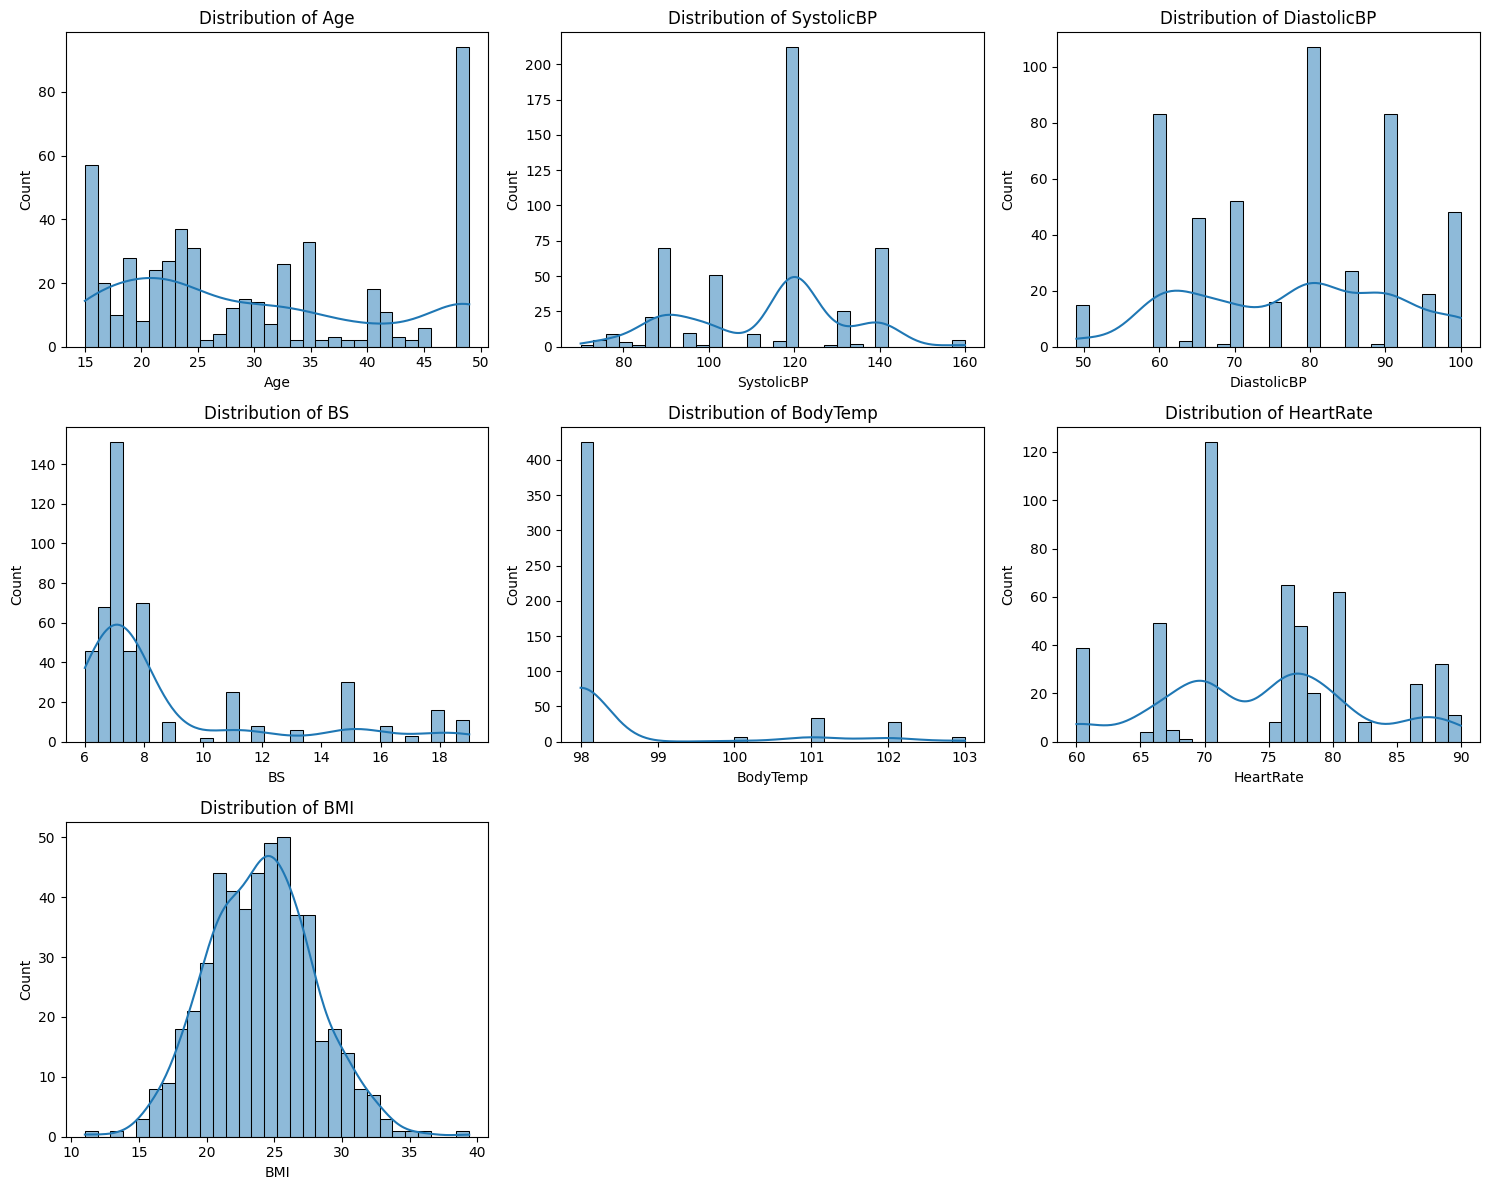

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate", "BMI"]

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


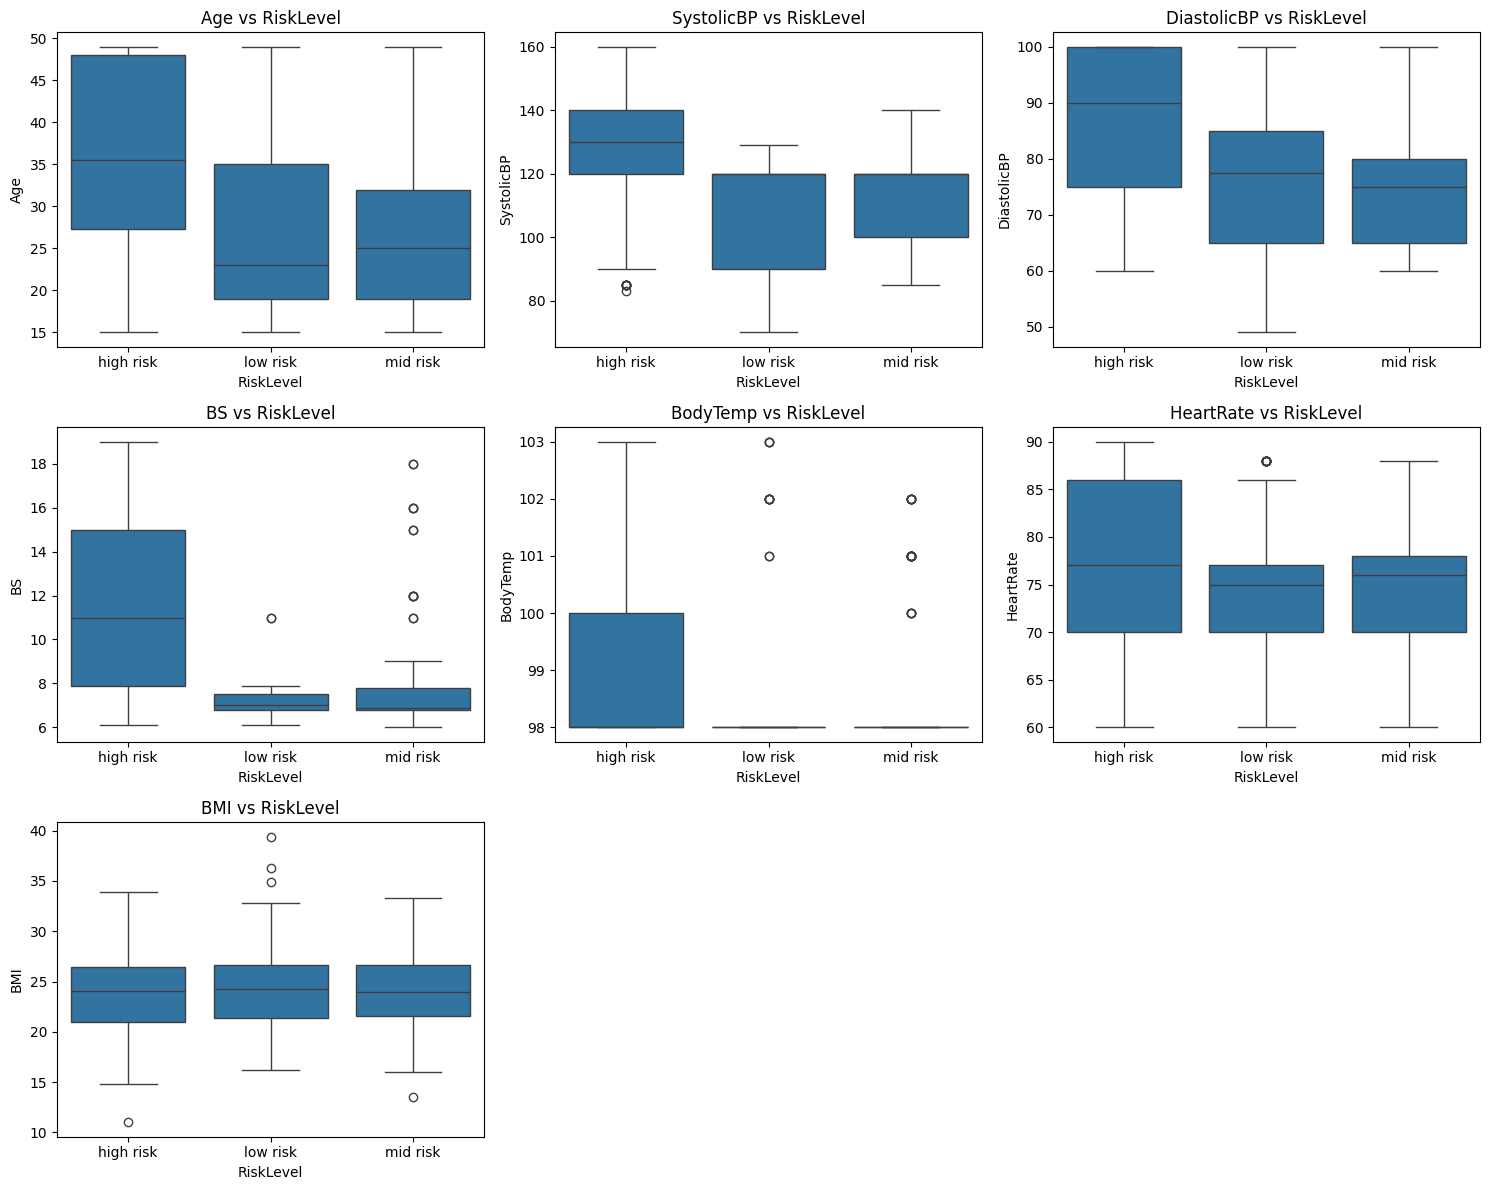

In [ ]:
#compare numeric features across risk level
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x="RiskLevel", y=col)
    plt.title(f"{col} vs RiskLevel")
plt.tight_layout()
plt.show()


# The boxplot shows that high-risk patients generally have higher systolic blood pressure (median ≈ 130), but a few individuals fall outside the expected range (around 80 mmHg). These are flagged as outliers, meaning their blood pressure is quite different from the majority in that group. In contrast, low- and mid-risk patients have lower and more consistent blood pressure values.

In [49]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel,Mode_of_delivery,History_of_Past_PPH,Parity,SBP_Category,DBP_Category,BS_Category,Temp_Category,HR_Category,BMI_Category
0,25,130,80,15.0,98,86,26.0,Low,high risk,Normal vaginal delivery,Yes,1,Elevated,High,Diabetes,Normal,Normal,Overweight
1,35,140,90,13.0,98,70,23.4,Low,high risk,Normal vaginal delivery,No,5,High,Severe,Diabetes,Normal,Normal,Normal
2,29,90,70,8.0,100,80,26.6,Low,high risk,Normal vaginal delivery,No,1,Normal,Normal,Prediabetes,Low-grade fever,Normal,Overweight
3,30,140,85,7.0,98,70,30.1,Low,high risk,Normal vaginal delivery,No,7,High,High,Normal (Post-meal),Normal,Normal,Obesity I
4,35,120,60,6.1,98,76,23.1,High,low risk,Normal vaginal delivery,No,2,Normal,Normal,Normal (Post-meal),Normal,Normal,Normal


# Categorical features

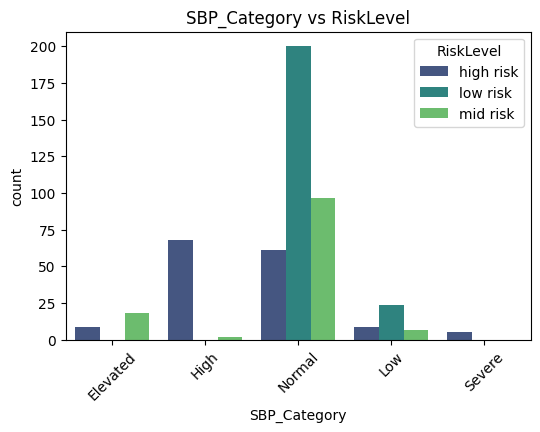

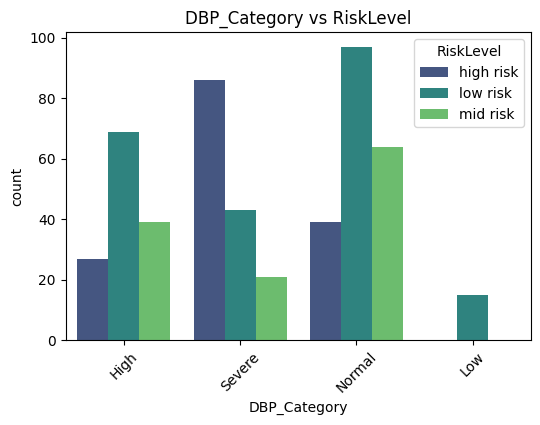

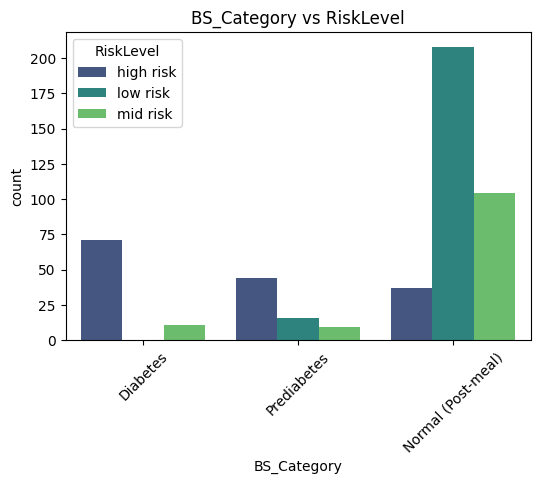

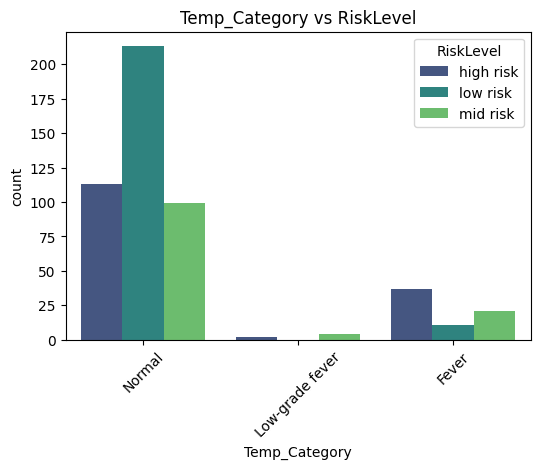

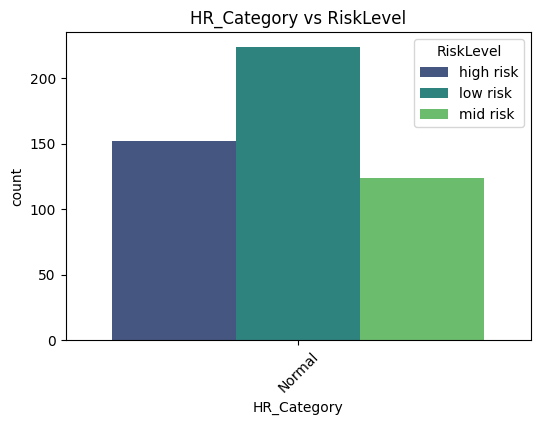

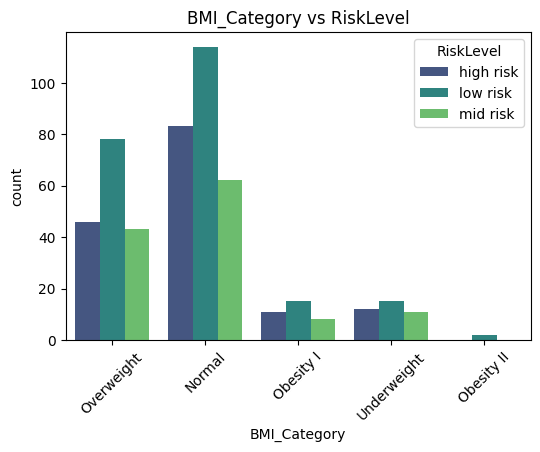

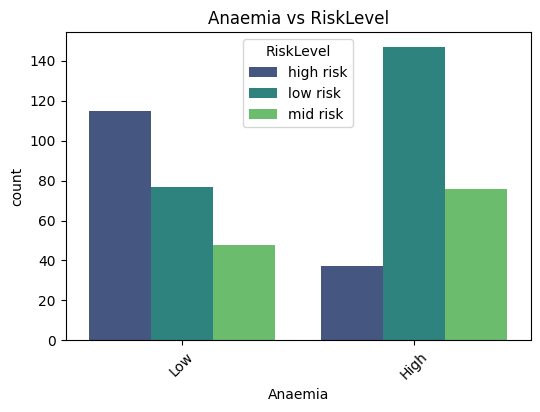

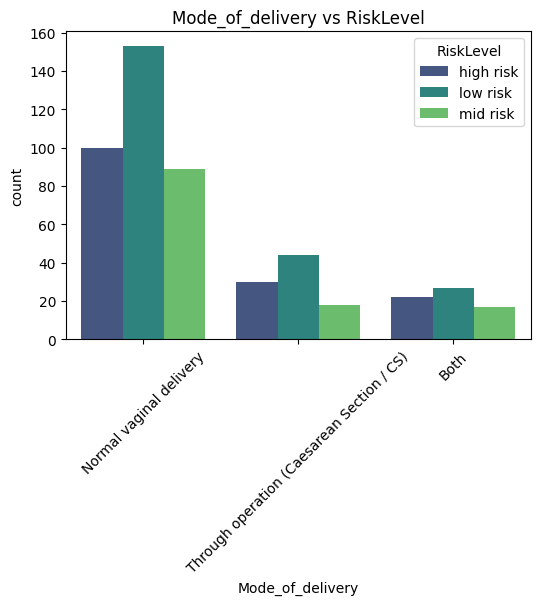

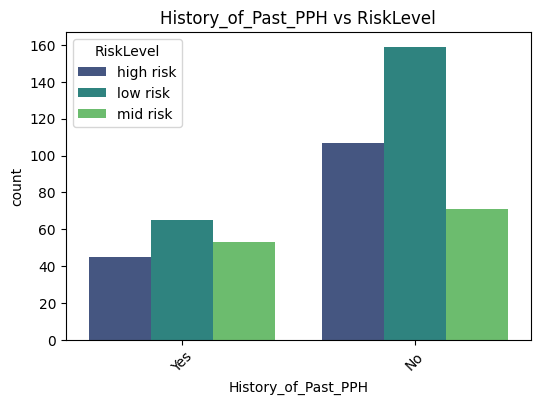

In [50]:
cat_features = ["SBP_Category","DBP_Category","BS_Category","Temp_Category","HR_Category","BMI_Category",
                "Anaemia","Mode_of_delivery","History_of_Past_PPH"]

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="RiskLevel", data=df, palette="viridis")
    plt.title(f"{col} vs RiskLevel")
    plt.xticks(rotation=45)
    plt.show()


# Correlation heatmap

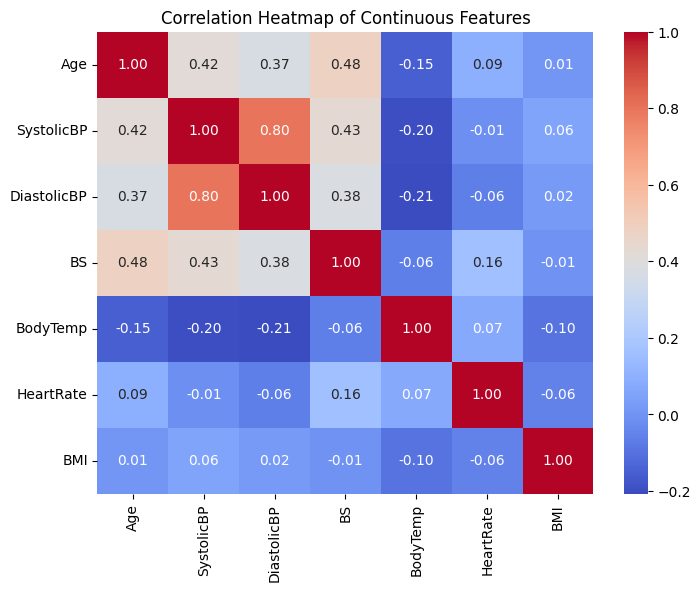

In [51]:
#correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[cont_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Continuous Features")
plt.show()

In [52]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel,Mode_of_delivery,History_of_Past_PPH,Parity,SBP_Category,DBP_Category,BS_Category,Temp_Category,HR_Category,BMI_Category
0,25,130,80,15.0,98,86,26.0,Low,high risk,Normal vaginal delivery,Yes,1,Elevated,High,Diabetes,Normal,Normal,Overweight
1,35,140,90,13.0,98,70,23.4,Low,high risk,Normal vaginal delivery,No,5,High,Severe,Diabetes,Normal,Normal,Normal
2,29,90,70,8.0,100,80,26.6,Low,high risk,Normal vaginal delivery,No,1,Normal,Normal,Prediabetes,Low-grade fever,Normal,Overweight
3,30,140,85,7.0,98,70,30.1,Low,high risk,Normal vaginal delivery,No,7,High,High,Normal (Post-meal),Normal,Normal,Obesity I
4,35,120,60,6.1,98,76,23.1,High,low risk,Normal vaginal delivery,No,2,Normal,Normal,Normal (Post-meal),Normal,Normal,Normal


In [53]:
for col in ['Anaemia', 'SBP_Category', 'DBP_Category', 'BS_Category',
            'Temp_Category', 'HR_Category', 'BMI_Category', 'History_of_Past_PPH']:
    print(col, df[col].unique())


Anaemia ['Low' 'High']
SBP_Category ['Elevated' 'High' 'Normal' 'Low' 'Severe']
DBP_Category ['High' 'Severe' 'Normal' 'Low']
BS_Category ['Diabetes' 'Prediabetes' 'Normal (Post-meal)']
Temp_Category ['Normal' 'Low-grade fever' 'Fever']
HR_Category ['Normal']
BMI_Category ['Overweight' 'Normal' 'Obesity I' 'Underweight' 'Obesity II']
History_of_Past_PPH ['Yes' 'No']


# Encoding and Scaling features

In [54]:
# convert categorical to string
df["RiskLevel"] = df["RiskLevel"].astype(str).str.strip().str.lower()

# mapping
risk_mapping = {
    "low risk": 0,
    "mid risk": 1,
    "high risk": 2
}

df["RiskLevel"] = df["RiskLevel"].map(risk_mapping)


In [55]:
# One-hot encode
df = pd.get_dummies(df, columns=['Mode_of_delivery'], drop_first=False)

# Convert all new dummy columns to int (0/1)
dummy_cols = [col for col in df.columns if 'Mode_of_delivery_' in col]
df[dummy_cols] = df[dummy_cols].astype(int)



In [56]:
# Remove extra spaces and standardize case
df['History_of_Past_PPH'] = df['History_of_Past_PPH'].str.strip().str.title()

# Fill missing values if any
df['History_of_Past_PPH'] = df['History_of_Past_PPH'].fillna('No')

# Map Yes/No to 1/0
df['History_of_Past_PPH'] = df['History_of_Past_PPH'].map({'Yes':1, 'No':0})


In [57]:
ordinal_mappings = {
    'Anaemia': {'Low':0, 'High':1},
    'SBP_Category': {'Low':0, 'Normal':1, 'Elevated':2, 'High':3, 'Severe':4},
    'DBP_Category': {'Low':0, 'Normal':1, 'High':2, 'Severe':3},
    'BS_Category': {'Normal (Post-meal)':0, 'Prediabetes':1, 'Diabetes':2},
    'Temp_Category': {'Normal':0, 'Low-grade fever':1, 'Fever':2},
    'HR_Category': {'Normal':0},  # Only one value, stays 0
    'BMI_Category': {'Underweight':0, 'Normal':1, 'Overweight':2, 'Obesity I':3, 'Obesity II':4}
}

# Encode ordinal features
for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
# Clean Parity column
df['Parity'] = df['Parity'].astype(str).str.lower().str.strip()

# Replace text with numbers
df['Parity'] = df['Parity'].replace({
    'once': 1,
    '7 times': 7
})

# Convert the column fully to integer
df['Parity'] = pd.to_numeric(df['Parity'], errors='coerce')


In [60]:
#Scale numerical features

numeric_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'BMI', 'Parity']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [61]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BMI,Anaemia,RiskLevel,History_of_Past_PPH,Parity,SBP_Category,DBP_Category,BS_Category,Temp_Category,HR_Category,BMI_Category,Mode_of_delivery_Both,Mode_of_delivery_Normal vaginal delivery,Mode_of_delivery_Through operation (Caesarean Section / CS)
0,-0.430801,0.881780,0.180834,1.828909,-0.408422,1.507954,0.498818,0,2,1,-1.214388,2,2,2,0,0,2,0,1,0
1,0.422947,1.421094,0.912362,1.242575,-0.408422,-0.571624,-0.164707,0,2,0,1.394394,3,3,2,0,0,1,0,1,0
2,-0.089302,-1.275479,-0.550694,-0.223258,1.156412,0.728112,0.651939,0,2,0,-1.214388,1,1,1,1,0,2,0,1,0
3,-0.003927,1.421094,0.546598,-0.516425,-0.408422,-0.571624,1.545146,0,2,0,2.698785,3,2,0,0,0,3,0,1,0
4,0.422947,0.342465,-1.282223,-0.780275,-0.408422,0.208218,-0.241268,1,0,0,-0.562192,1,1,0,0,0,1,0,1,0
5,-0.601551,1.421094,0.180834,-0.513493,-0.408422,-0.571624,-0.241268,1,2,0,0.090003,3,2,0,0,0,1,0,0,1
6,-0.601551,0.881780,-0.550694,-0.513493,-0.408422,0.468165,1.596187,1,1,0,0.090003,2,1,0,0,0,3,0,1,0
7,0.422947,-1.545137,-1.282223,0.656242,2.721246,1.507954,0.779540,1,2,0,2.046589,0,1,1,2,0,2,0,1,0
8,0.166822,0.342465,0.912362,-0.545741,-0.408422,-0.571624,-0.496470,0,1,1,-1.214388,1,3,0,0,0,1,0,1,0
9,1.020570,0.881780,0.180834,2.708409,-0.408422,-0.571624,0.549858,0,2,0,-1.214388,2,2,2,0,0,2,0,0,1


# Train Test Split

In [62]:
df.dtypes

,0
Age,float64
SystolicBP,float64
DiastolicBP,float64
BS,float64
BodyTemp,float64
HeartRate,float64
BMI,float64
Anaemia,int64
RiskLevel,int64
History_of_Past_PPH,int64


In [63]:
df['Parity'].value_counts()

,count
Parity,
0.090003,122
-0.562192,113
-1.214388,113
0.742198,76
1.394394,49
2.698785,15
2.046589,12


In [64]:
from sklearn.model_selection import train_test_split

X = df.drop('RiskLevel', axis=1)  # features
y = df['RiskLevel']  # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [65]:
import joblib

In [66]:
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

# Base Model

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[38  6  1]
 [ 9 12  4]
 [ 2  2 26]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        45
           1       0.60      0.48      0.53        25
           2       0.84      0.87      0.85        30

    accuracy                           0.76       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.75      0.76      0.75       100



In [68]:
import pandas as pd
pd.Series(y_train).value_counts()


,count
RiskLevel,
0,179
2,122
1,99


In [ ]:
# !pip install xgboost


In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,        # number of trees
    learning_rate=0.1,       # step size
    max_depth=5,             # complexity of trees
    subsample=0.8,           # prevent overfitting
    colsample_bytree=0.8,    # use fraction of features per tree
    random_state=42,
    eval_metric='mlogloss',  # for multi-class classification
    use_label_encoder=False
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.84      0.81        45
           1       0.67      0.56      0.61        25
           2       0.87      0.87      0.87        30

    accuracy                           0.78       100
   macro avg       0.77      0.76      0.76       100
weighted avg       0.78      0.78      0.78       100

Confusion Matrix:
 [[38  5  2]
 [ 9 14  2]
 [ 2  2 26]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:11:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Balancing dataset using SMOTE

In [70]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_resampled.value_counts().to_dict())

# Step 2: Train XGBoost on resampled data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 3: Evaluate on untouched test data
y_pred = xgb_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Before SMOTE: {0: 179, 2: 122, 1: 99}
After SMOTE: {0: 179, 2: 179, 1: 179}

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        45
           1       0.64      0.56      0.60        25
           2       0.90      0.90      0.90        30

    accuracy                           0.79       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.79      0.79      0.79       100

Accuracy: 0.79

Confusion Matrix:
 [[38  7  0]
 [ 8 14  3]
 [ 2  1 27]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:11:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Hyperparameter tuining

In [71]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit on resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test set
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best Score: 0.8305642090688818
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        45
           1       0.64      0.56      0.60        25
           2       0.90      0.90      0.90        30

    accuracy                           0.79       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.79      0.79      0.79       100

Accuracy: 0.79
Confusion Matrix:
 [[38  7  0]
 [ 8 14  3]
 [ 2  1 27]]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:12:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [72]:
import joblib

#saving the best model
joblib.dump(best_xgb, "my_model.pkl")


['my_model.pkl']

In [73]:
#saving the preprocessed script to ensure I use the same when making prediction
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [74]:
# Load model, scaler, and feature list
model = joblib.load("my_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_columns = joblib.load("feature_columns.pkl")


# Testing model on unseen dataset

In [75]:
# Example patient
patient_data = {
    "Age": 40,
    "SystolicBP": 150,
    "DiastolicBP": 100,
    "BS": 15.0,
    "BodyTemp": 100.4,
    "BMI": 28.0,
    "HeartRate": 100,
    "Anaemia": "Yes",
    "History_of_Past_PPH": "No",
    "Parity": 2,
    "Mode_of_delivery": 0
}

# Convert to DataFrame
patient_df = pd.DataFrame([patient_data])

# --- Encode categorical features as numbers ---
patient_df['Anaemia'] = patient_df['Anaemia'].str.strip().str.title().map({"Yes":1, "No":0})
patient_df['History_of_Past_PPH'] = patient_df['History_of_Past_PPH'].str.strip().str.title().map({"Yes":1, "No":0})

# --- Scale numeric features (same scaler you fit during training) ---
numeric_cols = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate','BMI', 'Parity']
patient_df[numeric_cols] = scaler.transform(patient_df[numeric_cols])

# --- Align columns with training set ---
patient_df = patient_df.reindex(columns=feature_columns, fill_value=0)

# --- Predict ---
prediction = model.predict(patient_df)
proba = model.predict_proba(patient_df)

# Manual reverse mapping
reverse_mapping = {0: "Low Risk", 1: "Mid Risk", 2: "High Risk"}

print("Predicted risk level:", reverse_mapping[prediction[0]])

# Probabilities (map index → risk class)
proba_dict = {reverse_mapping[i]: round(prob, 3) for i, prob in enumerate(proba[0])}
print("Prediction probabilities:", proba_dict)



Predicted risk level: High Risk
Prediction probabilities: {'Low Risk': np.float32(0.0), 'Mid Risk': np.float32(0.0), 'High Risk': np.float32(1.0)}


In [76]:
# --- Load saved objects ---
model = joblib.load("my_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_columns = joblib.load("feature_columns.pkl")

# --- Risk mapping ---
risk_mapping = {0: "Low Risk", 1: "Mid Risk", 2: "High Risk"}

# --- Low-risk patient record ---
low_risk_patient = {
    "Age": 22,
    "SystolicBP": 110,
    "DiastolicBP": 60,
    "BS": 4.5,
    "BodyTemp": 98.0,
    "BMI": 20.1,
    "HeartRate": 70,
    "Anaemia": "No",
    "History_of_Past_PPH": "No",
    "Parity": 1,
    "Mode_of_delivery": 0   # 0 = Vaginal, 1 = Cesarean
}

# --- Convert to DataFrame ---
patient_df = pd.DataFrame([low_risk_patient])

# --- Encode categorical features ---
patient_df['Anaemia'] = patient_df['Anaemia'].str.strip().str.title().map({"Low":0, "High":1, "Yes":1, "No":0})
patient_df['History_of_Past_PPH'] = patient_df['History_of_Past_PPH'].str.strip().str.title().map({"Yes":1, "No":0})

# --- Scale numeric features ---
numeric_cols = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate','BMI', 'Parity']
patient_df[numeric_cols] = scaler.transform(patient_df[numeric_cols])

# --- Align columns with training data ---
patient_df = patient_df.reindex(columns=feature_columns, fill_value=0)

# --- Predict risk ---
prediction = model.predict(patient_df)
proba = model.predict_proba(patient_df)

# --- Decode prediction ---
risk_label = risk_mapping[prediction[0]]
probabilities = {risk_mapping[i]: p for i, p in enumerate(proba[0])}

print(f"Predicted Risk Level: {risk_label}\n")
print("Prediction Probabilities:")
for risk, p in probabilities.items():
    print(f"{risk}: {p*100:.2f}%")


Predicted Risk Level: Low Risk

Prediction Probabilities:
Low Risk: 96.47%
Mid Risk: 3.48%
High Risk: 0.05%


In [77]:
# --- Load saved objects ---
model = joblib.load("my_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_columns = joblib.load("feature_columns.pkl")

# --- Risk mapping ---
risk_mapping = {0: "Low Risk", 1: "Mid Risk", 2: "High Risk"}

# --- Low-risk patient record ---
low_risk_patient = {
    "Age": 30,
    "SystolicBP": 130,
    "DiastolicBP": 90,
    "BS": 6.5,
    "BodyTemp": 98.0,
    "BMI": 25,
    "HeartRate": 80,
    "Anaemia": "No",
    "History_of_Past_PPH": "Yes",
    "Parity": 1,
    "Mode_of_delivery": 0   # 0 = Vaginal, 1 = Cesarean
}

# --- Convert to DataFrame ---
patient_df = pd.DataFrame([low_risk_patient])

# --- Encode categorical features ---
patient_df['Anaemia'] = patient_df['Anaemia'].str.strip().str.title().map({"Low":0, "High":1, "Yes":1, "No":0})
patient_df['History_of_Past_PPH'] = patient_df['History_of_Past_PPH'].str.strip().str.title().map({"Yes":1, "No":0})

# --- Scale numeric features ---
numeric_cols = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate','BMI', 'Parity']
patient_df[numeric_cols] = scaler.transform(patient_df[numeric_cols])

# --- Align columns with training data ---
patient_df = patient_df.reindex(columns=feature_columns, fill_value=0)

# --- Predict risk ---
prediction = model.predict(patient_df)
proba = model.predict_proba(patient_df)

# --- Decode prediction ---
risk_label = risk_mapping[prediction[0]]
probabilities = {risk_mapping[i]: p for i, p in enumerate(proba[0])}

print(f"Predicted Risk Level: {risk_label}\n")
print("Prediction Probabilities:")
for risk, p in probabilities.items():
    print(f"{risk}: {p*100:.2f}%")


Predicted Risk Level: Mid Risk

Prediction Probabilities:
Low Risk: 5.41%
Mid Risk: 90.04%
High Risk: 4.55%
